In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json


In [87]:
with open('../bench.json') as f:
    df = pd.json_normalize(json.load(f)['results'], record_path=['times'], meta='command')
    df.rename(columns={0: "time"}, inplace=True)

df['native'] = df.command.apply(lambda c: 'native' in c)
df['games'] = df.command.str.extract(r'.+-(\d+)')

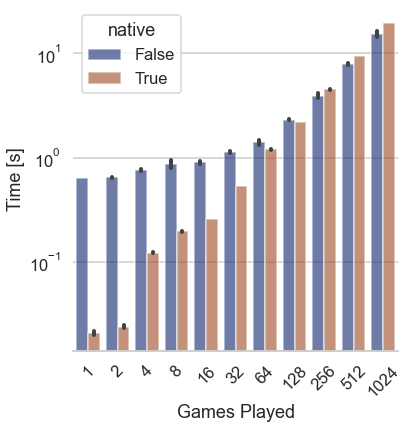

In [88]:
sns.set_theme(context='talk', style='whitegrid')

g = sns.catplot(data=df, x="games", y="time", hue="native", kind="bar",
    ci="sd", palette="dark", alpha=.6, height=6, legend_out=False, log=True)

plt.xticks(rotation=45)

sns.despine(left=True)
g.set_axis_labels("Games Played", "Time [s]")
